In [1]:
import netCDF4 as nf # This package helps to read the 3-D gridded (.nc) format.  
import datetime as dt #This helps to convert the time-steps in the netcdf files into readble date format 
import numpy as np
import matplotlib.pyplot as plt #For plotting spatial variables 
from mpl_toolkits.basemap import Basemap #Provides basemaps to be used as reference backgrounds for the 
#plotting the globally referenced climate variables over space anmd time

In [2]:
data_temp = nf.Dataset("air.mon.mean_1979-2015.nc") #importing datasets using netcdf
variables_temp = data_temp.variables

In [3]:
#Creating the time stamps in the form of real time date format: 
time_temp = variables_temp["time"]

time_start_temp = nf.date2index(dt.datetime(1979,1,1),time_temp,select="nearest")
time_end_temp = nf.date2index(dt.datetime(2015,12,31),time_temp,select="nearest")

dates= nf.num2date(time_temp[:],time_temp.units)
time= ([date.strftime('%Y-%m-%d') for date in dates[:]])

### Selecting the desired dates from the dataset: 

Selecting only the months of May, June, July, August, September and Octoberand the years from 2002-2011. The filtering of the dates is done so that comparision can be made with the another netc
df file which incorporates the sea-ice values for the above timescale. 

In [4]:
#selecting the months:
new_mon_temp=[]
for ii in range(len(time)):
    if time[ii][5:7]=='05'or time[ii][5:7]=='06' or time[ii][5:7]=='07' or time[ii][5:7]=='08' or time[ii][5:7]=='09' or time[ii][5:7]=='10':
        new_mon_temp.append(time[ii])

In [5]:
#selecting the years:
new_time_temp=[]
for ii in range(len(new_mon_temp)):
    if new_mon_temp[ii][0:4]=='2002'or new_mon_temp[ii][0:4]=='2003' or new_mon_temp[ii][0:4]=='2004' or new_mon_temp[ii][0:4]=='2005' or new_mon_temp[ii][0:4]=='2006' or new_mon_temp[ii][0:4]=='2007' or new_mon_temp[ii][0:4]=='2008' or new_mon_temp[ii][0:4]=='2009' or new_mon_temp[ii][0:4]=='2010' or new_mon_temp[ii][0:4]=='2011':
        new_time_temp.append(new_mon_temp[ii])

### Plotting temperatures with Sea-ice values:

In [2]:
temp_new = nf.Dataset("air.mon.mean_M-O_2002-2011.nc")
data_SICE = nf.Dataset("envisat_SIT_fb_snow-AMSR_sh_2002_2011_ease2_w50000.nc")

In [7]:
variables_SICE = data_SICE.variables
variables_new_temp= temp_new.variables

In [8]:
time_SICE = variables_SICE["time"]
time_new_temp= variables_new_temp["time"]
SIT=variables_SICE["SIT"]
air_temp=variables_new_temp["air"]

### Converting timesteps into a well defined date format:

Using the same function as above.

In [9]:
time_start_temp = nf.date2index(dt.datetime(2002,10,15),time_new_temp,select="nearest")
time_end_temp = nf.date2index(dt.datetime(2011,10,15),time_new_temp,select="nearest")

dates= nf.num2date(time_new_temp[:],time_new_temp.units)
time= ([date.strftime('%Y-%m-%d') for date in dates[:]])

In [11]:
air_temp_850hpa=air_temp[:,2,:,:]

In [12]:
import csv 

In [16]:
#mean Sea Ice Thickness (SIT) array

SIT_mean=[]
for ii in range(len(SIT)):
    mean_SIT = np.nanmean(SIT[ii])
    SIT_mean.append(mean_SIT)#since the values of SIT were very high compared to the temperatures, 
    #they are normalized by diving it by 20000
    
print(SIT_mean)

[1.0701234, 1.2257842, 1.2730579, 1.3609455, 1.3396847, 1.2838069, 0.91756576, 1.3589236, 1.4175305, 1.4811722, 1.3690678, 1.2644144, 0.89857256, 1.1891401, 1.4196584, 1.3836606, 1.3122635, 1.2869073, 0.91318613, 1.1432565, 1.2060528, 1.269771, 1.3158885, 1.1876222, 0.8987039, 1.1378773, 1.2981393, 1.4271022, 1.3540497, 1.3327978, 0.9211405, 1.2074852, 1.383052, 1.4741436, 1.4637773, 1.4633551, 1.0138283, 1.2541891, 1.3918551, 1.4536383, 1.5196618, 1.4750087, 0.9954332, 1.1593206, 1.230843, 1.389208, 1.3483666, 1.3287189, 0.948864, 1.161152, 1.3118474, 1.4788907, 1.4660721, 1.4321911, nan]


/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


list

In [23]:
import pandas
df = pandas.DataFrame(data={"col1": SIT_mean})
df.to_csv("SIT_average.csv", sep=',',index=False)

In [15]:
#mean temperature array

temp_mean=[]
for ii in range(len(air_temp_850hpa)):
    mean = np.mean(air_temp_850hpa[ii])
    temp_mean.append(mean)
print(temp_mean)


[0.7537985, 1.0711151, 2.2765992, 3.0889165, 2.8391538, 1.5735804, 0.7264135, 0.92717403, 2.3932343, 2.6303566, 2.365722, 1.5972887, 0.67720115, 1.448, 3.0606213, 3.4040647, 2.7103295, 1.7743342, 1.0852251, 1.0978525, 2.590276, 2.9572203, 2.8518896, 1.6322781, 0.8110047, 1.4576006, 3.0389721, 3.5018952, 2.9331481, 1.5539421, 0.91202724, 1.0680152, 2.3095064, 3.3015301, 2.712904, 1.9483637, 0.5569015, 1.4829458, 2.649003, 3.645568, 2.779791, 1.7369435, 0.9655416, 1.7542571, 2.830851, 3.1563413, 2.9787285, 1.8143376, 1.0125786, 1.2286524, 2.9759212, 3.8958812, 3.372472, 1.7691292, 0.8542562]


## Comparitive plot to study relations between temperature and Sea-ice Thickness: 

Dates used on the x-axis are the ones which are extracted in a proper date format.


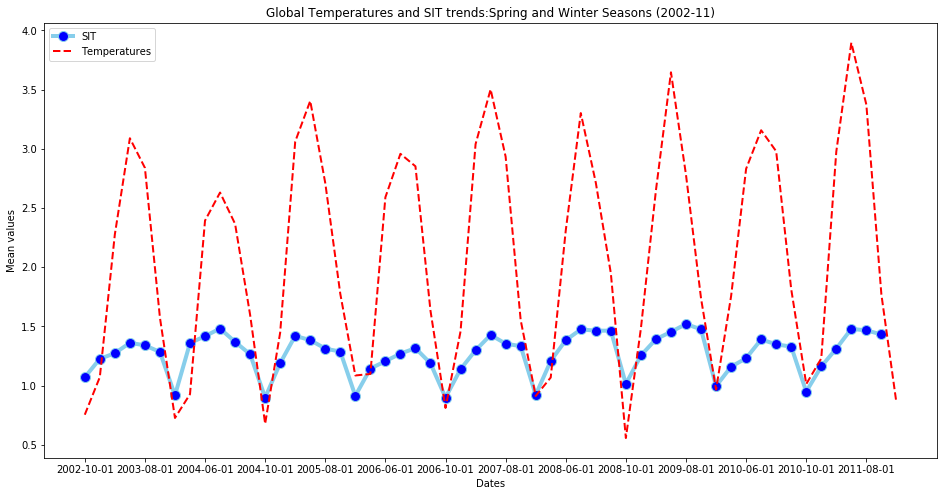

In [19]:
fig = plt.figure(figsize=(16.0,8.0))
plt.plot(time,SIT_mean, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=4,label='SIT')
plt.plot(time,temp_mean, marker='', color='red', linewidth=2, linestyle='dashed', label="Temperatures")
plt.xticks(np.arange(0, 55, 4.0))
plt.xlabel('Dates')
plt.ylabel('Mean values')
plt.title('Global Temperatures and SIT trends:Spring and Winter Seasons (2002-11)')
plt.legend(loc='best')
plt.show()


In [100]:
a=np.std(air_temp_850hpa)
error = a/(np.max(air_temp_850hpa)-np.min(air_temp_850hpa)) 
error

0.18960032

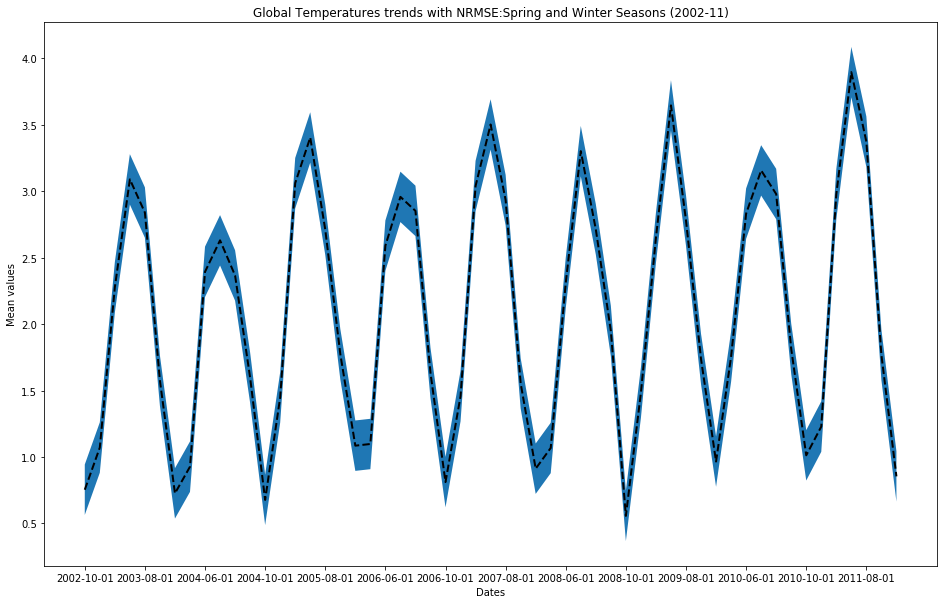

In [104]:
fig = plt.figure(figsize=(16.0,10.0))
plt.plot(time,temp_mean, marker='', color='black', linewidth=2, linestyle='dashed', label="Temperatures")
plt.xticks(np.arange(0, 55, 4.0))
plt.xlabel('Dates')
plt.ylabel('Mean values')
plt.title('Global Temperatures trends with NRMSE:Spring and Winter Seasons (2002-11)')
plt.fill_between(time, temp_mean-error, temp_mean+error)
plt.show()

In [105]:
a=np.std(SIT)
error = a/(np.max(SIT)-np.min(SIT)) 
error

0.13602959

/home/eebc177student/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


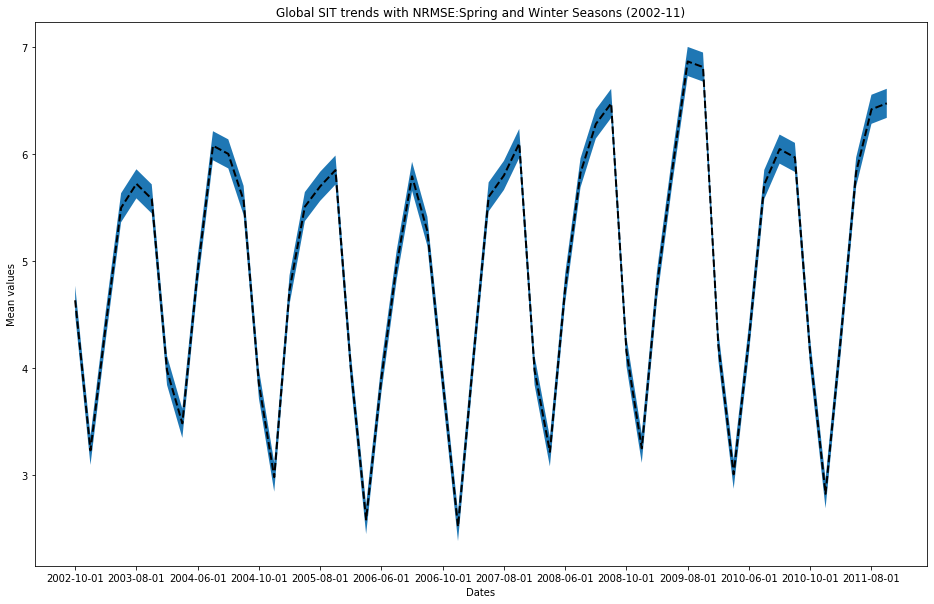

In [108]:
fig = plt.figure(figsize=(16.0,10.0))
plt.plot(time,SIT_mean, marker='', color='black', linewidth=2, linestyle='dashed')
plt.xticks(np.arange(0, 55, 4.0))
plt.xlabel('Dates')
plt.ylabel('Mean values')
plt.title('Global SIT trends with NRMSE:Spring and Winter Seasons (2002-11)')
plt.fill_between(time, SIT_mean-error, SIT_mean+error)
plt.show()

## Working with anomalies and barplots:

Anomalies are a measure of the departure from the mean. This is achieved by subtracting the mean values from every value in the dataset. 
The boxplot is the best representation of the anomalies. 

In [133]:
SIT_anom=[]
mean=np.mean(SIT[:])
for ii in range(len(SIT)):
    anomaly = np.mean(SIT[ii])-mean
    SIT_anom.append(anomaly/20000)#since the values of SIT were very high compared to the temperatures, 
    #they are normalized by diving it by 20000
print(list(SIT_anom))

[-0.24925577256944453, -1.6543419053819446, -0.4831585069444445, 0.6169457899305555, 0.8410977430555555, 0.7001024305555554, -0.9063971788194445, -1.4014268663194445, 0.021173914930555475, 1.1976125868055554, 1.1211840711805554, 0.6855493055555555, -1.0325046006944445, -1.9050342881944444, -0.15093389756944453, 0.6274184461805554, 0.8174750868055555, 0.9697387586805555, -0.8813698350694446, -2.3021581163194447, -0.9738104600694445, 0.08445711805555547, 0.9112426649305555, 0.39698797743055547, -1.0012444444444446, -2.3675311631944447, -0.8004452256944445, 0.7185301649305554, 0.9199422743055555, 1.2187789930555555, -0.9054073350694445, -1.6683161241319446, -0.1359889756944445, 0.9438301649305555, 1.4004270399305554, 1.5937422743055554, -0.7294190538194445, -1.6352137803819444, -0.10477842881944452, 0.9804973524305555, 1.9866993055555555, 1.9340571180555555, -0.6719585069444445, -1.8782422960069445, -0.6102522569444445, 0.8351328993055555, 1.1661368055555554, 1.0885090711805554, -0.752237

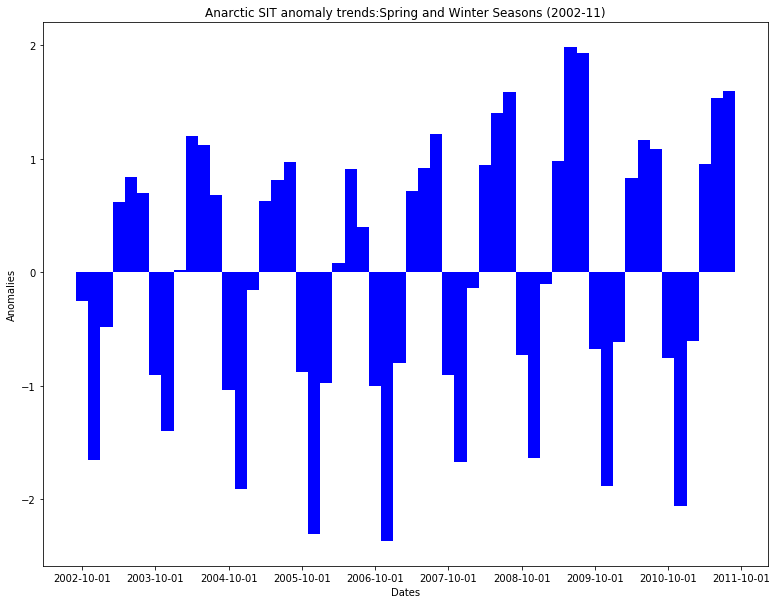

In [167]:
fig = plt.figure(figsize=(13.0,10.0))
ax = plt.subplot(111)
ax.bar(time, SIT_anom, width=1, color='b')
plt.xticks(np.arange(0, 55, 6.0))
plt.xlabel('Dates')
plt.ylabel('Anomalies')
plt.title('Anarctic SIT anomaly trends:Spring and Winter Seasons (2002-11)')

plt.show()